In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_theme(style="whitegrid")
%matplotlib inline
df = pd.read_csv('train.csv')

In [5]:
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())


Dataset shape: (891, 12)

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Dropping "Cabin" because too many missing values
df.drop('Cabin', axis=1, inplace=True)

# Filling median age for Missing values
df['Age'].fillna(df['Age'].median(), inplace=True)

# Filling Mode for Missing Values
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

print("\nCleaned values:\n", df.isnull().sum())


Cleaned values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\rodes\AppData\Local\Temp\ipykernel_29428\2962465869.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\rodes\AppData\Local\Temp\ipykernel_29428\2962465869.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

C:\Users\rodes\AppData\Local\Temp\ipykernel_29428\1732523791.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='Blues', ax=axs[1, 0])


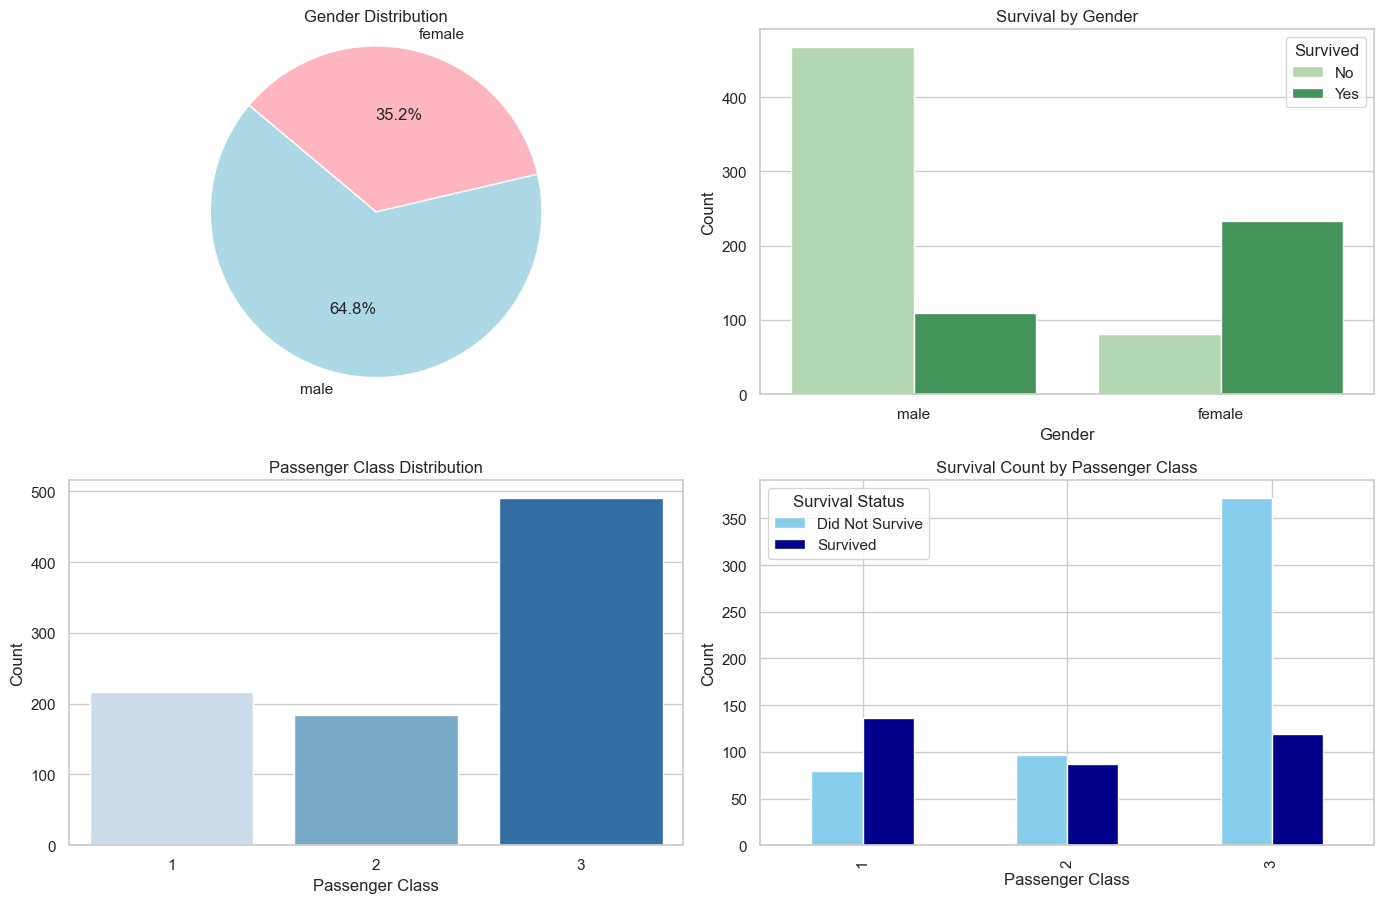

In [7]:
# Pie chart - gender distribution
gender_counts = df['Sex'].value_counts()
gender_labels = gender_counts.index.tolist()
gender_colors = ['lightblue', 'lightpink']

# Bar plot - gender vs survival
gender_survival = df.groupby(['Sex', 'Survived']).size().unstack()
gender_survival.columns = ['Did Not Survive', 'Survived']

# Survival count overall
survival_counts = df['Survived'].value_counts().sort_index()
survival_labels = ['Did Not Survive', 'Survived']

# Pclass vs survival (grouped bar)
class_survival = df.groupby(['Pclass', 'Survived']).size().unstack()
class_survival.columns = ['Did Not Survive', 'Survived']

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Gender Distribution (Pie)
axs[0, 0].pie(gender_counts, labels=gender_labels, autopct='%1.1f%%',
              startangle=140, colors=gender_colors)
axs[0, 0].set_title('Gender Distribution')
axs[0, 0].axis('equal')

# Plot 2: Gender vs Survival (Grouped Bar Plot)
sns.countplot(x='Sex', hue='Survived', data=df, palette='Greens', ax=axs[0, 1])
axs[0, 1].set_title('Survival by Gender')
axs[0, 1].set_xlabel('Gender')
axs[0, 1].set_ylabel('Count')
axs[0, 1].legend(title='Survived', labels=['No', 'Yes'])


# Plot 3: Passenger Class Distribution
sns.countplot(x='Pclass', data=df, palette='Blues', ax=axs[1, 0])
axs[1, 0].set_title('Passenger Class Distribution')
axs[1, 0].set_xlabel('Passenger Class')
axs[1, 0].set_ylabel('Count')

# Plot 4: Survival by Passenger Class - Grouped Bar Plot
class_survival.plot(kind='bar', color=['skyblue', 'darkblue'], ax=axs[1, 1])
axs[1, 1].set_title('Survival Count by Passenger Class')
axs[1, 1].set_xlabel('Passenger Class')
axs[1, 1].set_ylabel('Count')
axs[1, 1].legend(title='Survival Status')
axs[1, 1].tick_params(axis='x', labelrotation=90)  

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

C:\Users\rodes\AppData\Local\Temp\ipykernel_29428\1277148917.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_rate = df_age_surv.groupby('age_bin')['Survived'].mean().reset_index()
C:\Users\rodes\AppData\Local\Temp\ipykernel_29428\1277148917.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Embarked', data=df, palette='Blues', ax=axs[1, 0])


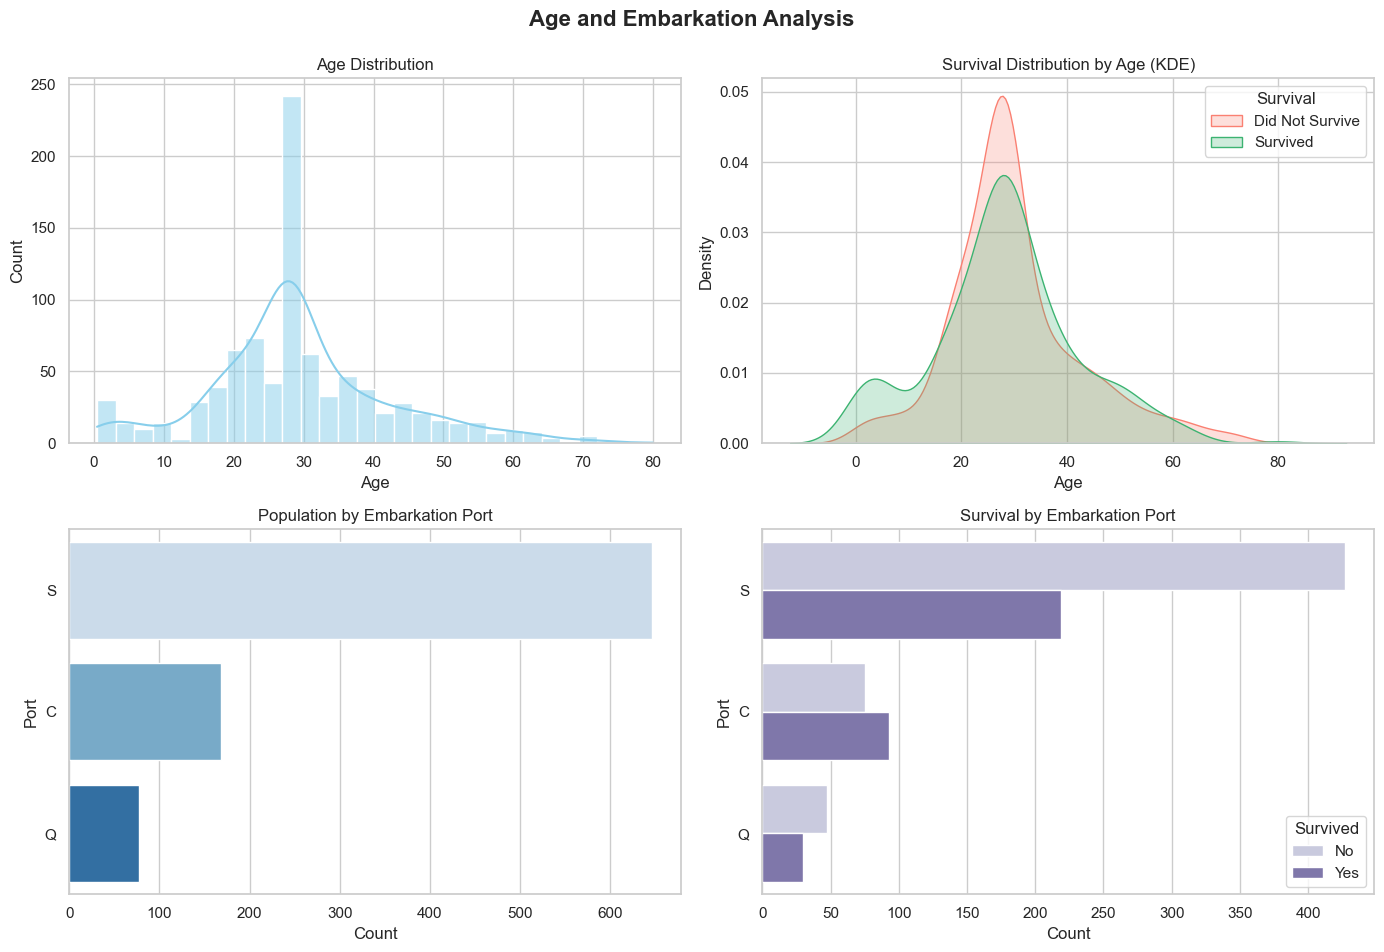

In [8]:
df_age_surv = df.dropna(subset=['Age'])

# Bin Age and compute survival rate
df_age_surv['age_bin'] = pd.cut(df_age_surv['Age'], bins=10)
age_survival_rate = df_age_surv.groupby('age_bin')['Survived'].mean().reset_index()
age_survival_rate['age_bin'] = age_survival_rate['age_bin'].astype(str) 

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot 5: Age Distribution
sns.histplot(data=df, x='Age', kde=True, color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title("Age Distribution")
axs[0, 0].set_xlabel("Age")
axs[0, 0].set_ylabel("Count")

# Plot 6: Survival Distribution by Age 
sns.kdeplot(data=df_age_surv[df_age_surv['Survived'] == 0], x='Age', fill=True, label='Did Not Survive', color='salmon', ax=axs[0, 1])
sns.kdeplot(data=df_age_surv[df_age_surv['Survived'] == 1], x='Age', fill=True, label='Survived', color='mediumseagreen', ax=axs[0, 1])
axs[0, 1].set_title("Survival Distribution by Age (KDE)")
axs[0, 1].set_xlabel("Age")
axs[0, 1].set_ylabel("Density")
axs[0, 1].legend(title="Survival")

# Plot 7: Embarkation Port Population 
sns.countplot(y='Embarked', data=df, palette='Blues', ax=axs[1, 0])
axs[1, 0].set_title("Population by Embarkation Port")
axs[1, 0].set_xlabel("Count")
axs[1, 0].set_ylabel("Port")

# Plot 8: Survival by Embarkation Port 
sns.countplot(y='Embarked', hue='Survived', data=df, palette='Purples', ax=axs[1, 1])
axs[1, 1].set_title("Survival by Embarkation Port")
axs[1, 1].set_xlabel("Count")
axs[1, 1].set_ylabel("Port")
axs[1, 1].legend(title='Survived', labels=['No', 'Yes'])


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Age and Embarkation Analysis", fontsize=16, fontweight='bold')
plt.show()

C:\Users\rodes\AppData\Local\Temp\ipykernel_29428\2379009577.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Pclass', y='Fare', palette='Set3', ax=axs[1])
C:\Users\rodes\AppData\Local\Temp\ipykernel_29428\2379009577.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y='Fare', palette='pastel')


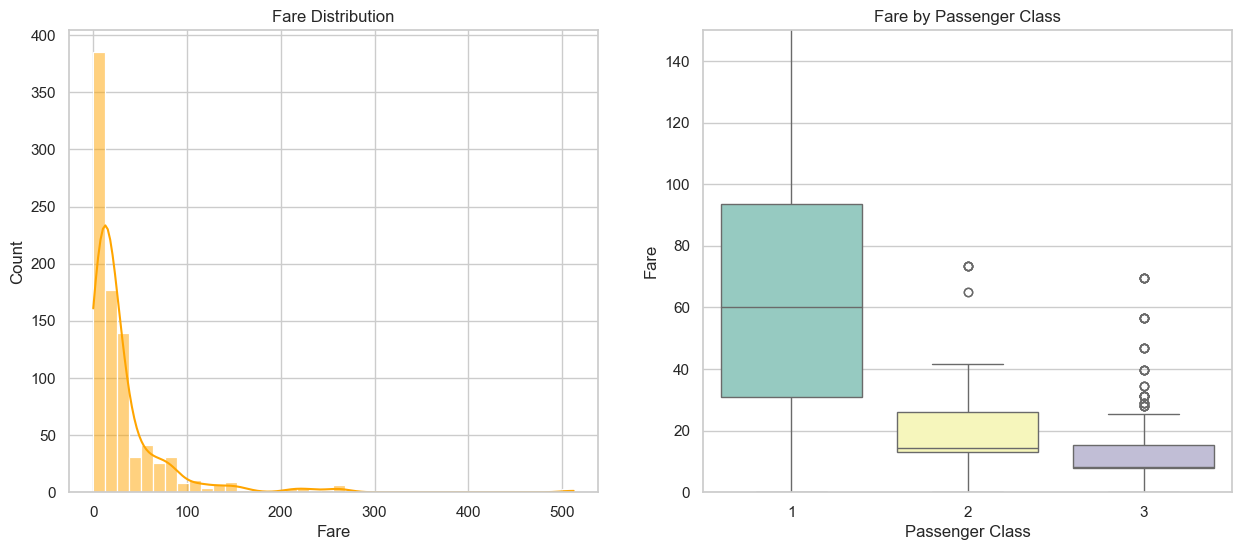

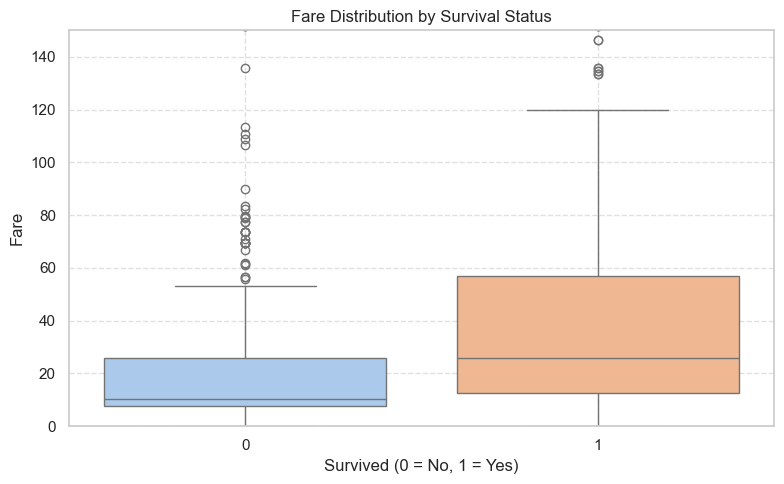

<Figure size 640x480 with 0 Axes>

In [9]:
df_clean = df.dropna(subset=['Fare', 'Pclass', 'Survived'])

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df['Fare'], bins=40, kde=True, color='#FFA500', ax=axs[0])
axs[0].set_title('Fare Distribution')
axs[0].set_xlabel('Fare')
axs[0].set_ylabel('Count')

# Plot 9: Fare vs Passenger Class 
sns.boxplot(data=df, x='Pclass', y='Fare', palette='Set3', ax=axs[1])
axs[1].set_title('Fare by Passenger Class')
axs[1].set_xlabel('Passenger Class')
axs[1].set_ylabel('Fare')
axs[1].set_ylim(0, 150)  

# Plot 10: Fare by Class & Survival 
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Survived', y='Fare', palette='pastel')
plt.title("Fare Distribution by Survival Status")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Fare")
plt.ylim(0, 150) 
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


plt.tight_layout()
plt.suptitle("Fare Distribution and Its Relationship with Class & Survival", fontsize=15, fontweight='bold', y=1.05)
plt.show()

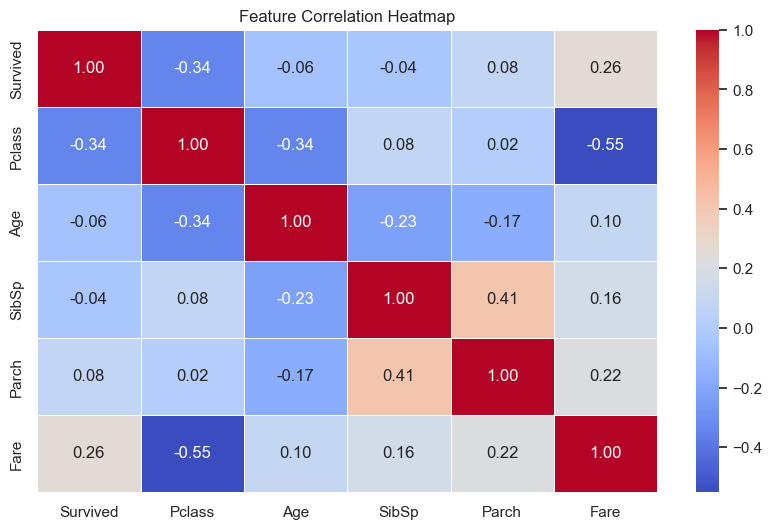

In [26]:
numeric_df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
# Plot 11: heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [34]:
from IPython.display import display, Markdown

display(Markdown("""
## Final Observations – Titanic EDA

**Survival by Gender**  
- **Female passengers** had much better survival outcomes than **males**.  
- **Gender** turned out to be a clear influencing factor.  

**Class Factor**  
- Those in **first class** had significantly **higher chances of survival**.  
- The **third-class** passengers faced the **worst survival rates**.  

**Age Patterns**  
- **Children** and **teenagers** were slightly more likely to survive.  
- **Older adults** didn’t fare as well overall.  

**Family Connections**  
- Travelers with **2–3 family members** onboard had better odds.  
- People travelling **alone** were at a disadvantage.  

**Boarding Port**  
- **Cherbourg** stood out with a noticeably higher survival rate.  
- **Southampton** had the **highest number of passengers**, but **lower survival** overall.  

**Fare Insight**  
- A **higher fare** was often linked to better outcomes, hinting at the safety advantage in **higher ticket classes**.  

**Overall Takeaway**  
- The data highlights how **social status**, **age**, and **companionship** played crucial roles in **survival chances**.
"""))



## Final Observations – Titanic EDA

**Survival by Gender**  
- **Female passengers** had much better survival outcomes than **males**.  
- **Gender** turned out to be a clear influencing factor.  

**Class Factor**  
- Those in **first class** had significantly **higher chances of survival**.  
- The **third-class** passengers faced the **worst survival rates**.  

**Age Patterns**  
- **Children** and **teenagers** were slightly more likely to survive.  
- **Older adults** didn’t fare as well overall.  

**Family Connections**  
- Travelers with **2–3 family members** onboard had better odds.  
- People travelling **alone** were at a disadvantage.  

**Boarding Port**  
- **Cherbourg** stood out with a noticeably higher survival rate.  
- **Southampton** had the **highest number of passengers**, but **lower survival** overall.  

**Fare Insight**  
- A **higher fare** was often linked to better outcomes, hinting at the safety advantage in **higher ticket classes**.  

**Overall Takeaway**  
- The data highlights how **social status**, **age**, and **companionship** played crucial roles in **survival chances**.
